In [1]:
import pandas as pd
import numpy as np

In [2]:
farm_data = pd.read_csv("C:\\Users\\venkat333\\Desktop\\PHD\\farm_data.csv")

In [3]:
train_data = pd.read_csv("C:\\Users\\venkat333\\Desktop\\PHD\\train_data.csv")

In [4]:
weather_data = pd.read_csv("C:\\Users\\venkat333\\Desktop\\PHD\\train_weather.csv")

In [5]:
train_data.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [6]:
train_data.shape

(20216100, 4)

In [7]:
train_data.isnull().sum()

date               0
farm_id            0
ingredient_type    0
yield              0
dtype: int64

In [8]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
yield,20216100.0,2117.121076,153235.624995,0.0,18.3,78.775,267.984,21904700.0


In [9]:
farm_data.count()

farm_id                       1449
operations_commencing_year     675
num_processing_plants          355
farm_area                     1449
farming_company               1449
deidentified_location         1449
dtype: int64

In [10]:
farm_data['farm_id'].duplicated().sum()

15

# checking the duplicated 


In [11]:
farm_data[farm_data.farm_id.duplicated(keep = 'first') | farm_data.farm_id.duplicated(keep = 'last')]

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
66,fid_40459,1981.0,NaN,3459.800623,Dole Food Company,location 7369
178,fid_68761,NaN,NaN,2173.186976,Wayne Farms,location 5489
184,fid_68761,NaN,NaN,3174.588413,Obery Farms,location 5489
287,fid_73431,1956.0,NaN,3132.038839,Wayne Farms,location 5489
325,fid_81333,1959.0,NaN,5499.857600,Obery Farms,location 5290
360,fid_54932,1949.0,NaN,6466.048800,Obery Farms,location 5290
376,fid_68792,1942.0,NaN,54436.977365,Wayne Farms,location 5290
395,fid_97094,1912.0,NaN,829.159275,Del Monte Foods,location 5290
510,fid_26064,NaN,NaN,425.588643,Del Monte Foods,location 5290
537,fid_18990,1959.0,NaN,6800.499600,Obery Farms,location 5290


In [12]:
farm_data.drop([1076,537,510,634,705,574,360,678,1300,178,822,679,287,325,395],axis=0,inplace=True)

In [13]:
farm_data['farm_id'].duplicated().sum()

0

In [14]:
data_new = pd.merge(train_data,farm_data.rename(columns={'farm_id':'farm_id'}),on='farm_id',how='left')

In [15]:
data_new.head()

,date,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0,2008.0,NaN,690.455096,Obery Farms,location 7369
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0,2004.0,NaN,252.696160,Obery Farms,location 7369
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0,1991.0,NaN,499.446528,Obery Farms,location 7369
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0,1975.0,NaN,10833.140121,Obery Farms,location 7369


In [16]:
data_new = data_new.rename(columns = {'date':'timestamp'})

# combing above data with weather data

In [17]:
new_data2 = pd.merge(data_new,weather_data,how = 'left')

In [18]:
new_data2

,timestamp,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.000,2008.0,NaN,690.455096,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.000,2004.0,NaN,252.696160,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.000,1991.0,NaN,499.446528,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.000,2002.0,NaN,2200.407555,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.000,1975.0,NaN,10833.140121,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,2016-12-31 23:00:00,fid_41664,ing_w,8.750,1914.0,NaN,1822.663957,Sanderson Farms,location 5150,1.7,NaN,180.0,-5.6,1008.5,-1.0,8.8
20216096,2016-12-31 23:00:00,fid_14529,ing_w,4.825,NaN,NaN,399.297094,Obery Farms,location 5150,1.7,NaN,180.0,-5.6,1008.5,-1.0,8.8
20216097,2016-12-31 23:00:00,fid_46454,ing_w,0.000,1997.0,NaN,1046.552295,Sanderson Farms,location 5150,1.7,NaN,180.0,-5.6,1008.5,-1.0,8.8
20216098,2016-12-31 23:00:00,fid_24103,ing_w,159.575,2001.0,NaN,2766.186825,Dole Food Company,location 5150,1.7,NaN,180.0,-5.6,1008.5,-1.0,8.8


In [19]:
new_data2.columns

Index(['timestamp', 'farm_id', 'ingredient_type', 'yield',
       'operations_commencing_year', 'num_processing_plants', 'farm_area',
       'farming_company', 'deidentified_location', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

In [20]:
new_data2.dtypes

timestamp                      object
farm_id                        object
ingredient_type                object
yield                         float64
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
temp_obs                      float64
cloudiness                    float64
wind_direction                float64
dew_temp                      float64
pressure_sea_level            float64
precipitation                 float64
wind_speed                    float64
dtype: object

In [21]:
import seaborn as sns

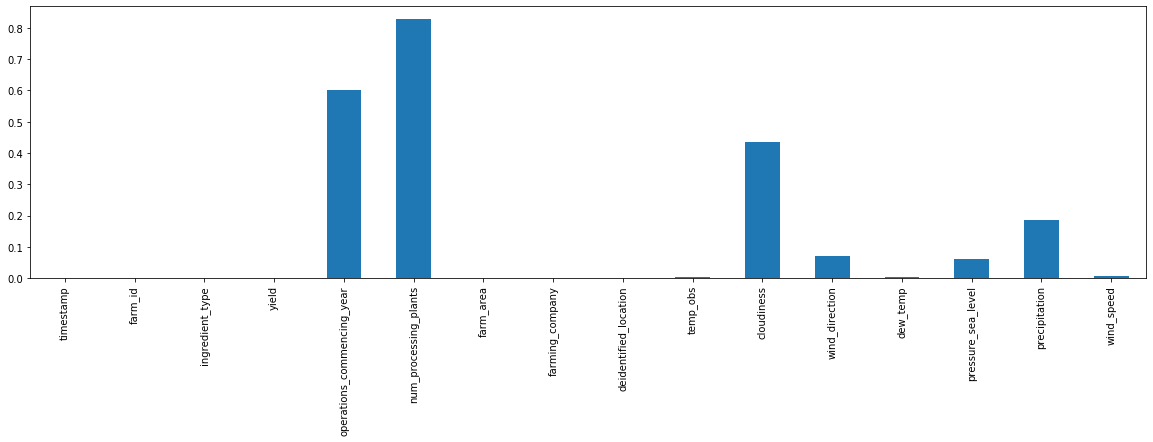

In [23]:
#checking the percentage of null values in the columns
((new_data2.isnull().sum())/new_data2.shape[0]).plot(kind = 'bar',figsize=(20,5))

In [25]:
new_data2.isnull().sum()

timestamp                            0
farm_id                              0
ingredient_type                      0
yield                                0
operations_commencing_year    12171967
num_processing_plants         16726426
farm_area                            0
farming_company                      0
deidentified_location                0
temp_obs                         97260
cloudiness                     8827339
wind_direction                 1454866
dew_temp                        100747
pressure_sea_level             1216127
precipitation                  3755342
wind_speed                      144523
dtype: int64

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

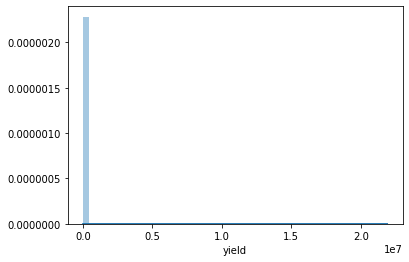

In [24]:
sns.distplot(new_data2["yield"])

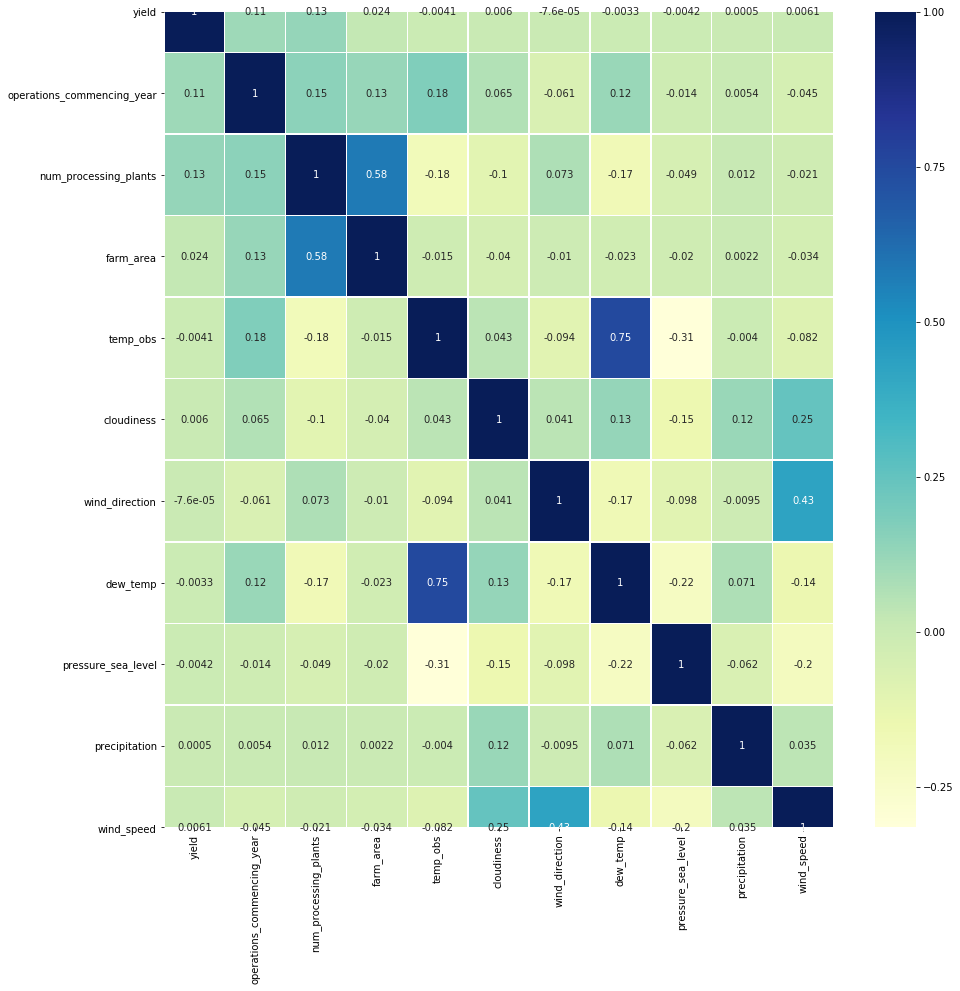

In [25]:
cormat = new_data2.corr()

f , ax = plt.subplots(figsize=(15,15))
sns.heatmap(cormat,ax=ax,cmap="YlGnBu" ,linewidths=0.5,annot=True)

In [ ]:
from sklearn.preprocessing import Normalizer
normalizeddf_train = Normalizer().fit_transform(new_data2)

In [71]:
pd.set_option('display.width', 100)
pd.set_option('precision', 2)
print(normalizeddf_train.corr(method='pearson'))

AttributeError: 'numpy.ndarray' object has no attribute 'corr'